In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
set_config(transform_output="pandas")

In [ ]:
# ID of the Google Sheet for student food preferences
sheet_id = "1zsxedf5S4xSxfbrudc12rH0MMlcxJVSPn7soZcTNUfk"

# Title of the Google Sheet, which is the number after "gid" in the url.
sheet_name = "1050069865"

# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"
#https://docs.google.com/spreadsheets/d/1zsxedf5S4xSxfbrudc12rH0MMlcxJVSPn7soZcTNUfk/edit?usp=sharing
# Create a Pandas DataFrame from the CSV data
moosic5000_df = pd.read_csv(url,
                       index_col=["name","id", "artist"])

# Dropping artist, id and html as we cant get the average from here.
to_drop = ['loudness', 'time_signature', 'type', 'html', 'duration_ms']
moosic5000_df = moosic5000_df.drop(columns=to_drop)

# First get the columns with PCA after minmax scaling

In [ ]:
moosic5000_df = moosic5000_df.loc[:, ~moosic5000_df.columns.str.contains('^Unnamed')]

In [ ]:
# Create a StandardScaler object
scaler = MinMaxScaler()

# Scale the moosic5000_df DataFrame
moosic5000_df_minmax = scaler.fit_transform(moosic5000_df)

In [ ]:
moosic5000_df_minmax

,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,id,artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,0.680455,0.25900,1.000000,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.767322,0.39900,0.181818,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,0.880041,0.73000,0.181818,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,0.729059,0.05020,0.363636,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.673216,0.11900,0.545455,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.272727,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,0.194416,0.10100,0.545455,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,0.061634,0.00093,0.818182,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469


In [ ]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(moosic5000_df_minmax)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(moosic5000_df_minmax)

pca_basic_df

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
name,id,artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,-0.280655,-0.704791,0.508277,0.438981,-0.257753,0.558214,0.557168,0.197247,-0.098319,-0.010812
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.073781,0.456457,0.375308,-0.225818,0.081638,-0.169779,0.039111,0.109188,-0.167806,-0.016335
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,-0.018948,0.530483,0.460961,-0.230686,0.276064,-0.007390,0.037743,-0.139322,0.191394,0.276742
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,0.508922,0.082236,0.814553,-0.006619,-0.076000,0.109894,0.221863,0.101487,-0.082814,0.008629
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.530786,0.024181,0.747361,0.173233,-0.152916,-0.080651,0.007684,0.093370,0.037354,-0.011741
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,1.097256,-0.368237,0.143026,-0.105708,-0.116127,-0.078155,-0.001977,-0.068980,-0.077746,0.019320
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,0.910150,-0.277392,0.225955,0.173683,-0.306083,-0.095555,-0.027665,-0.106276,-0.100089,0.012641
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,1.221640,-0.596006,-0.013107,0.424054,0.000267,-0.077642,-0.008364,-0.144993,-0.158674,0.031190


In [ ]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.27900433, 0.26532464, 0.18677727, 0.1168562 , 0.06208156,
       0.02820829, 0.02313057, 0.01817457, 0.01432141, 0.00612115])

### **Getting PCA only with cumulative explained variance**

In [ ]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)

cumulative_sum_of_variance

array([0.27900433, 0.54432898, 0.73110625, 0.84796245, 0.91004401,
       0.9382523 , 0.96138287, 0.97955744, 0.99387885, 1.        ])

In [ ]:
# Create a PCA object
pca_variance = PCA(n_components = 0.94)

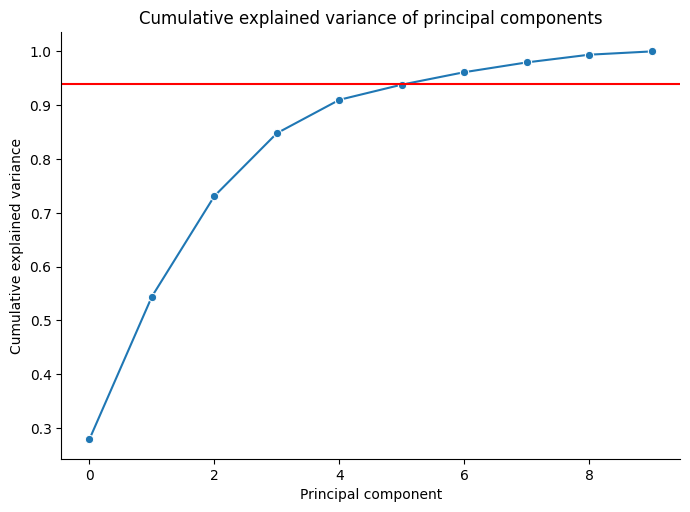

In [ ]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.94,
            color = 'red');

In [ ]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df_minmax = pca_variance.fit_transform(moosic5000_df_minmax)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df_minmax

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6
name,id,artist,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,-0.280655,-0.704791,0.508277,0.438981,-0.257753,0.558214,0.557168
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.073781,0.456457,0.375308,-0.225818,0.081638,-0.169779,0.039111
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,-0.018948,0.530483,0.460961,-0.230686,0.276064,-0.007390,0.037743
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,0.508922,0.082236,0.814553,-0.006619,-0.076000,0.109894,0.221863
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.530786,0.024181,0.747361,0.173233,-0.152916,-0.080651,0.007684
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,1.097256,-0.368237,0.143026,-0.105708,-0.116127,-0.078155,-0.001977
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,0.910150,-0.277392,0.225955,0.173683,-0.306083,-0.095555,-0.027665
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,1.221640,-0.596006,-0.013107,0.424054,0.000267,-0.077642,-0.008364


# Now apply clusters

## Estimate the number of clusters

## 1. Inertia and elbow method

### We have very large dataset of 5000 songs. So Ahmed suggested to keep the cluster between 20-30 which makes sense. because if we keep 4-5 cluster then in one cluster there will be ~ 1000 songs and in reality, a playlist doesnt contain 1000 songs. I am keeping the interval 25-40

In [ ]:
#list(range(1,50+1))

In [ ]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 40

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(25, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(pca_variance_df_minmax)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

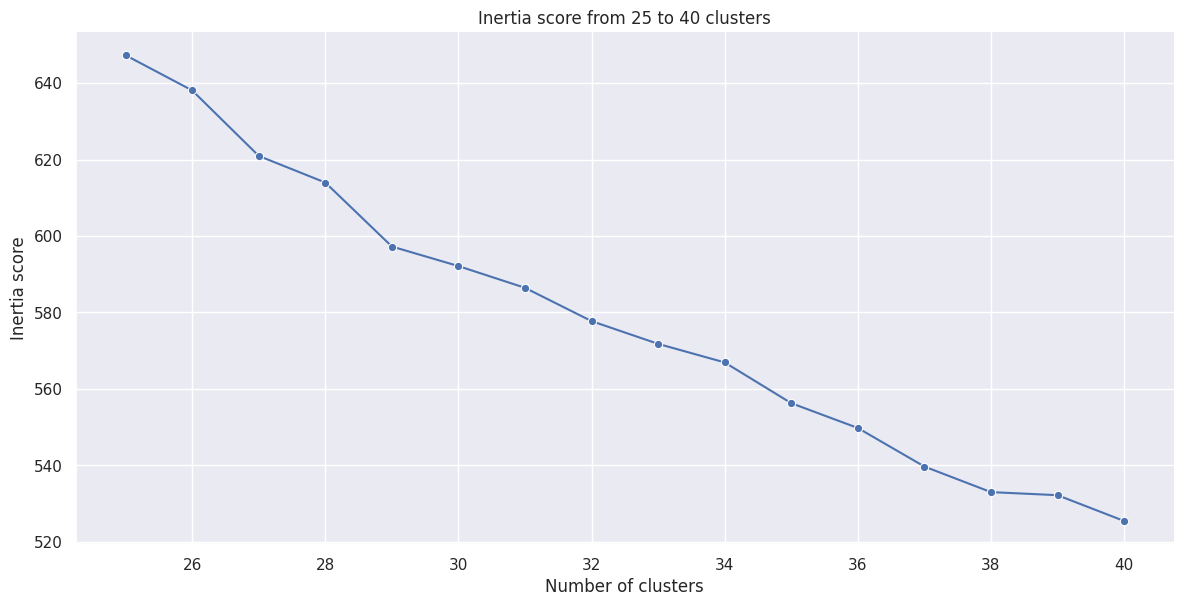

In [ ]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(25, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 6,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 25 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In my opinion k=4 here.

## 2. The Silhoutte score for clustering 25-40

In [ ]:
# Set the maximum number of clusters to try
max_k = 40

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(25, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(pca_variance_df_minmax)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(pca_variance_df_minmax, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

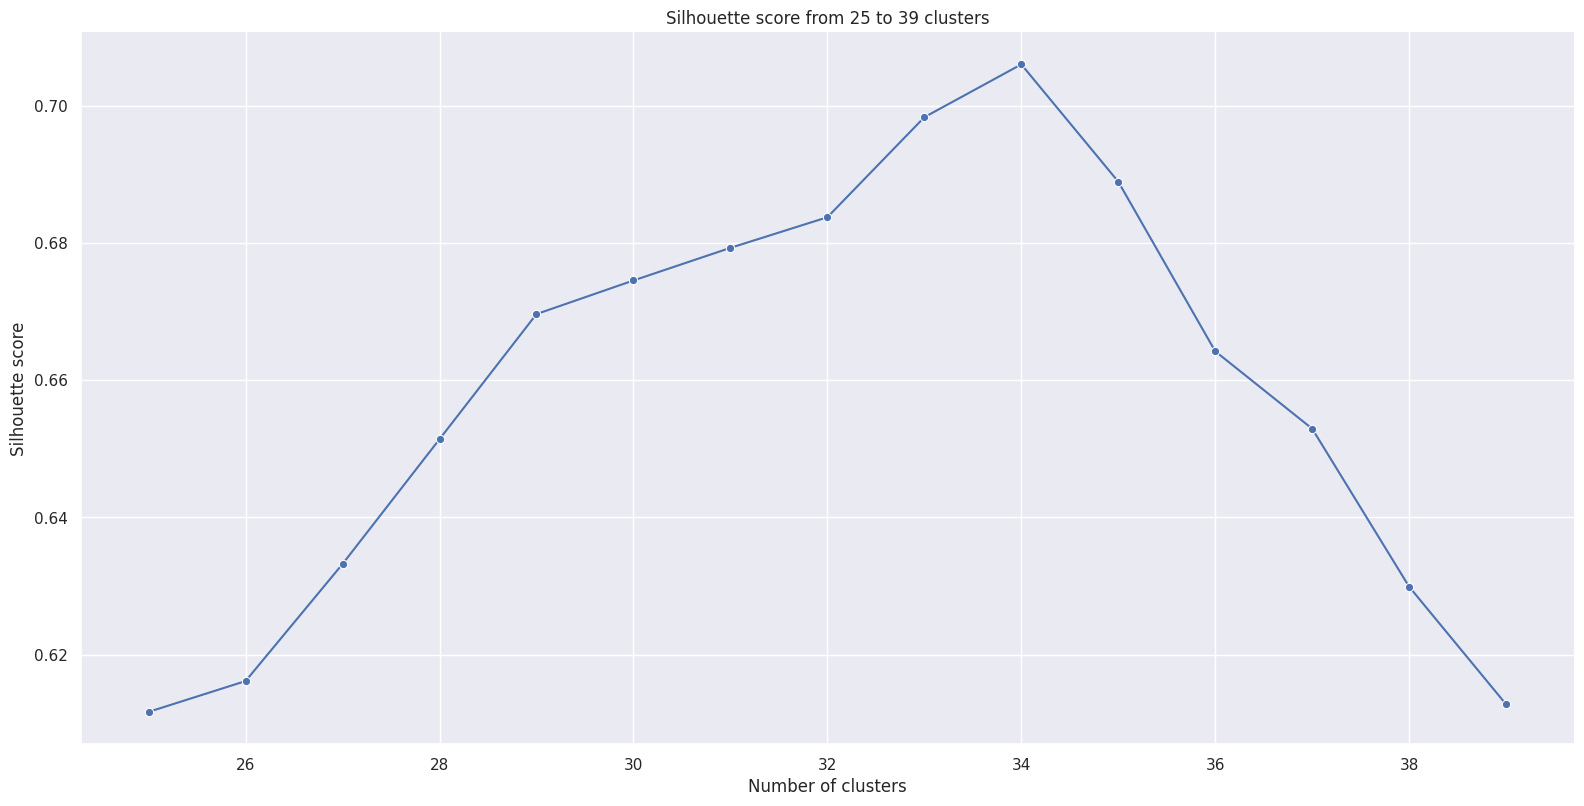

In [ ]:
(
sns.relplot(y = sil_scores,
            x = range(25, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 25 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

The highest point is at 34 for me. So 34 clusters

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(pca_variance_df_minmax, labels)
print(f"Silhouette Score: {score:.4f}")  # Should usually be between -1.0 and 1.0

Silhouette Score: 0.2163


## Assign cluster labels to Dataframe

In [ ]:
from sklearn.cluster import KMeans

# Let's say you have PCA-reduced features in `pca_df`
kmeans = KMeans(n_clusters=34, random_state=123)
pca_variance_df_minmax['cluster'] = kmeans.fit_predict(pca_variance_df_minmax)


In [ ]:
moosic5000_df_minmax['cluster'] = kmeans.labels_

## Get songs in each cluster

In [ ]:
for i in range(34):
    print(f"\n🎧 Songs in Cluster {i}:")
    display(moosic5000_df_minmax[moosic5000_df_minmax['cluster'] == i])



🎧 Songs in Cluster 0:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Nova Bossa Nova,2RPHy1PlxehscIM1K1wQMy,Marcos Valle,0.618407,0.739,0.727273,1.0,0.049237,0.525100,0.736041,0.147923,0.894416,0.444030,0
Under Your Spell,38vNwoJygRx1u77aJOV8Zb,Desire,0.591520,0.599,0.727273,1.0,0.036383,0.027811,0.658883,0.095035,0.481218,0.493271,0
La Nueva Reconquista de Graná,6Oj0gEBy4t8cYNX43u6cXd,Grupo De Expertos Solynieve,0.236815,0.640,0.818182,1.0,0.051089,0.414659,0.766497,0.093921,0.554315,0.779158,0
Just Like Honey,1LwP9g1Hjbs64jXM2Qsxry,The Jesus and Mary Chain,0.352637,0.552,0.727273,1.0,0.046078,0.000081,0.625381,0.059878,0.493401,0.567134,0
Talking Backwards,0cCq9wWxSs7Gj9oCNKqN56,Real Estate,0.433299,0.880,0.454545,1.0,0.032789,0.029618,0.889340,0.136778,0.528934,0.704668,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Growing Into the Flesh,3wve3wCLgB5Vge4ilHM5bf,Electrocution,0.375388,0.951,0.727273,1.0,0.157952,0.000002,0.882234,0.187437,0.462944,0.610860,0
Grind Box,59ilR0QDH95L9tNmIZN5F3,Broken Hope,0.322647,0.851,0.818182,1.0,0.050545,0.000474,0.872081,0.116515,0.545178,0.616959,0
Captain Howdy,5DEGOuhmKzL6RlNSMFGvXp,Broken Hope,0.339193,0.646,0.818182,1.0,0.047712,0.001335,0.904569,0.148936,0.484264,0.385219,0



🎧 Songs in Cluster 1:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Previsao,5iKuMCDh634YGrg2HrhtHp,Bossacucanova,0.697001,0.864,0.090909,1.0,0.041612,0.643574,0.363452,0.140831,0.544162,0.467288,1
Samba de Verão,3gDzuF3Dy0K4RQszBFAYCv,Marcos Valle,0.720786,0.405,0.000000,1.0,0.034532,0.816265,0.000159,0.332320,0.857868,0.536628,1
Águas De Março,4P9HLmNcE6dUUvsPUvl3gs,Antônio Carlos Jobim,0.660807,0.552,0.272727,1.0,0.138344,0.835341,0.000000,0.123607,0.481218,0.669382,1
Don't Stop the Carnival,014sDbzN0MSugmC703Ic4h,Sonny Rollins,0.497415,0.525,0.000000,1.0,0.064270,0.570281,0.000000,0.683891,0.829442,0.489107,1
"Brigas, Nunca Mais",4WfT503LMc9zLewdsok9un,João Gilberto,0.512927,0.242,0.363636,1.0,0.036166,0.704819,0.000000,0.175279,0.744162,0.386326,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Callaita,2TH65lNHgvLxCKXM3apjxI,Bad Bunny,0.630817,0.624,0.181818,1.0,0.336601,0.602410,0.000002,0.246201,0.247716,0.823258,1
Nunca Estoy,6f4LYJwICqxoAILj82kwB0,C. Tangana,0.948294,0.377,0.181818,1.0,0.175381,0.475904,0.003726,0.301925,0.404061,0.630843,1
The Potter's House - Live,2GLX6WynSRAirDye9AtKkw,Tramaine Hawkins,0.455016,0.625,0.090909,1.0,0.155773,0.707831,0.000000,0.706180,0.589848,0.603220,1



🎧 Songs in Cluster 2:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,0.680455,0.2590,1.000000,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,2
Madalena,33u3dO0JWjerYpFN61J3ug,Maria Gasolina,0.698035,0.2070,1.000000,0.0,0.059368,0.966867,0.420305,0.113475,0.694416,0.437081,2
Não Sei,52mwxbVQOtYXntgvyXyBc4,Sílvia Pérez Cruz,0.395036,0.0866,0.090909,0.0,0.043137,0.981928,0.002000,0.237082,0.159391,0.518912,2
Rebel Rebel,2rIzPAaLY6ocCanj5H7edQ,Seu Jorge,0.801448,0.2060,0.545455,0.0,0.057734,0.882530,0.000318,0.141844,0.561421,0.562924,2
Karoliina Kaunis,7BlLxHwobm2gHjXev9dNVe,Maria Gasolina,0.778697,0.2150,1.000000,0.0,0.319172,0.620482,0.004711,0.092401,0.387817,0.609085,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grace,4dKwDayzoCJMIO5RyF5FFf,Kelly Price,0.384695,0.5790,0.727273,0.0,0.051198,0.470884,0.000000,0.099493,0.319797,0.576270,2
I Need You Now,44q2DhInsQYJ8X1q2H1RNj,Smokie Norful,0.350569,0.2730,0.454545,0.0,0.033660,0.731928,0.000000,0.154002,0.308629,0.452376,2
In The Room,0Toq1jVrrLqQXUGh2Kcn1p,Lexi,0.569804,0.6510,0.545455,0.0,0.093682,0.591365,0.000000,0.190476,0.176650,0.487191,2



🎧 Songs in Cluster 3:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Lust For Life,1nXXiAnSuCfmf733yQm42T,Girls,0.267839,0.696,0.727273,0.0,0.034858,0.011446,0.161421,0.149949,0.523858,0.360699,3
On A Mountain,3BIOgDZVS4iAmtDJ1S6RrD,Danny L Harle,0.506722,0.724,0.454545,0.0,0.046405,0.118474,0.000008,0.063931,0.263959,0.724342,3
Flames (with ZAYN) - R3HAB & Skytech VIP Remix,2bZYJvVRN5EqIvAUFhUNls,R3HAB,0.367115,0.789,0.454545,0.0,0.179739,0.014859,0.000000,0.035968,0.171574,0.375924,3
Nice To Meet Ya,3cphb8kdsjElYR7r5icK3H,Niall Horan,0.611169,0.841,0.363636,0.0,0.033115,0.011948,0.000000,0.400203,0.397970,0.509528,3
Youngblood,55S2PQgSMYAhgoTCcGCDfw,5 Seconds of Summer,0.616339,0.854,0.636364,0.0,0.504357,0.016968,0.000000,0.125633,0.154315,0.562054,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Allein Allein,4Mc1fuIWXvrFSav9D2Oig2,Polarkreis 18,0.480869,0.844,0.636364,0.0,0.051307,0.000557,0.012893,0.200608,0.131980,0.616805,3
Ein Kompliment,3ptJBraFGtaeprD4BHmTfV,Sportfreunde Stiller,0.433299,0.874,0.363636,0.0,0.037691,0.001446,0.000051,0.146910,0.629442,0.371541,3
Lieder,5Zd6xRDfkWRT1FF1CnmvOG,Adel Tawil,0.535677,0.756,0.454545,0.0,0.050218,0.301205,0.000000,0.226950,0.473096,0.858778,3



🎧 Songs in Cluster 4:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Someone for You,1jalG6lS08Gu8q16MgDbrC,Warm Soda,0.234747,0.995,0.000000,1.0,0.235294,0.002440,0.304569,0.255319,0.213198,0.792317,4
Aquellos Ojos,6H6PVRpRJ3L9K7wEGNDmLa,Mujeres,0.440538,0.729,0.000000,1.0,0.032680,0.003614,0.009604,0.337386,0.338071,0.654269,4
Mercè,2Vsd9OvQoupID4ed9tWvZK,Vàlius,0.335057,0.726,0.000000,1.0,0.035839,0.008474,0.000000,0.085005,0.361421,0.541572,4
Al Final Abrazos,6P44JxYETAAYfwqSMrpCiu,Mujeres,0.253361,0.729,0.000000,1.0,0.044553,0.025904,0.000009,0.352584,0.354315,0.556157,4
Single Ladies (Put a Ring on It),5R9a4t5t5O0IsznsrKPVro,Beyoncé,0.440538,0.584,0.090909,1.0,0.322440,0.038454,0.000000,0.190476,0.276142,0.903953,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
The World Keeps Turning,0wn5YGy522pjLjjb6zZL8i,Napalm Death,0.213030,0.989,0.181818,1.0,0.126362,0.000017,0.077259,0.061499,0.206091,0.750339,4
Under The Moon's Fog,0nFGDLSFEOAEfIh9FPW3DR,Vital Remains,0.249224,0.968,0.272727,1.0,0.157952,0.000345,0.406091,0.103343,0.034924,0.676424,4
Die Welt steht still,2QTVhkfm3K3nSqu3pVXob7,Revolverheld,0.391934,0.868,0.181818,1.0,0.049455,0.010141,0.000000,0.103343,0.278173,0.803640,4



🎧 Songs in Cluster 5:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Brigas Nunca Mais,5gvBgfXusUpxjOWHyYJXVg,Brazilian Jazz,0.547053,0.2760,0.000000,1.0,0.049782,0.975904,0.898477,0.134752,0.284264,0.449245,5
O Pato (The Duck) - Live At Carnegie Hall/1964,1SEK1Yd01136xaLxAe0G70,João Gilberto,0.642192,0.1800,0.181818,1.0,0.067429,0.878514,0.839594,0.707194,0.897462,0.794037,5
Triste,5v8WqKhW9CBk2WF9PAcSIw,Brazilian Jazz,0.630817,0.3400,0.181818,1.0,0.037037,0.909639,0.872081,0.098784,0.465990,0.485186,5
Violão Vadio,5zE2UL4L0EAOl0do6kD3Hp,Raphael Rabello,0.376422,0.0884,0.454545,1.0,0.044662,0.930723,0.654822,0.128673,0.154315,0.417005,5
Máquina de Ritmo - Ao Vivo,3hv8SDnq2ETLT5FoMY28Da,Gilberto Gil,0.607032,0.2960,0.181818,1.0,0.244009,0.882530,0.607107,0.396150,0.516751,0.806930,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Pines Of Rome, P. 141: 3. The Pines Of The Janiculum",09R0O5z1MZR7s2vbNlDKTG,Ottorino Respighi,0.123061,0.0338,0.363636,1.0,0.046187,0.941767,0.867005,0.081662,0.035939,0.446526,5
"Don Giovanni, K.527: Overture",02GgkjgUsnDcgQCL0JQfG3,Wolfgang Amadeus Mozart,0.403309,0.1740,0.181818,1.0,0.040632,0.872490,0.879188,0.113475,0.310660,0.603519,5
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,0.208893,0.0694,0.272727,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,5



🎧 Songs in Cluster 6:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Laia Ladia,5BUYtDh62uirLH4vMnE2dA,Brazilian Jazz,0.400207,0.469,0.818182,0.0,0.045643,0.226908,0.043046,0.074975,0.516751,0.399995,6
Dolcenera,1DFFUsN49AUonUcTiQNnjI,Fabrizio De André,0.703206,0.492,1.000000,0.0,0.047495,0.177711,0.000057,0.203647,0.604061,0.588004,6
Across 110th Street - Original,637TZlQOtAmR1qP8CZuT8R,Bobby Womack,0.560496,0.730,1.000000,0.0,0.044553,0.044177,0.000000,0.055623,0.516751,0.521365,6
Devil Or Angel,2B0vzJSvp2Y0Bx8HUN4jyT,Lou Doillon,0.630817,0.645,0.636364,0.0,0.030501,0.000227,0.000069,0.111449,0.288325,0.448110,6
Blackeye,69EK2G7kMexNqRT8GTNtOA,Love Inks,0.834540,0.624,1.000000,0.0,0.036166,0.190763,0.003939,0.223911,0.530964,0.578022,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Te Boté - Remix,3V8UKqhEK5zBkBb6d6ub8i,Nio Garcia,0.933816,0.675,1.000000,0.0,0.233115,0.544177,0.000013,0.060284,0.448731,0.450988,6
Here We Are,3Edww8KursYqB9E9MLHRXC,Cross Worship,0.612203,0.891,1.000000,0.0,0.143791,0.195783,0.000000,0.126646,0.482234,0.560708,6
We Gon’ Be Alright,0ErItBOhcHJahcQ8BGqk4V,Tye Tribbett,0.854188,0.524,0.727273,0.0,0.118736,0.283133,0.000000,0.099291,0.288325,0.514234,6



🎧 Songs in Cluster 7:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Agua De Beber,4ic2XfSYoMch7DrdNf2T3N,Sophie Milman,0.682523,0.759,0.636364,1.0,0.047603,0.243976,0.002305,0.076596,0.710660,0.441502,7
Magalenha,1KhskNApqcI0XuIbbeERlw,Sérgio Mendes,0.847983,0.633,0.818182,1.0,0.081155,0.129518,0.000000,0.098480,0.726904,0.544988,7
Alegria,1K3JwmUeXS2g8OpRhtxtDO,Batida,0.739400,0.691,0.636364,1.0,0.094662,0.003323,0.221320,0.133739,0.758376,0.635614,7
Tirei o Chapéu,1NC2mfagQJAUejZNuMernG,Batida,0.749741,0.927,0.636364,1.0,0.086601,0.000546,0.000000,0.043769,0.835533,0.631160,7
I Wish You Were Here,4AVIdds2A4E4UsZcVU0Uso,Alpha Blondy,0.823164,0.566,0.636364,1.0,0.075708,0.020080,0.018376,0.117528,0.588832,0.672901,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Picky,4tPL9PeVZY4c0jUPtSD5nx,Joey Montana,0.809721,0.748,0.727273,1.0,0.097168,0.147590,0.000000,0.175279,0.818274,0.435637,7
Quiere Beber,3rPAD722s5FFNnwjC91t7Z,Anuel AA,0.799380,0.570,0.727273,1.0,0.123094,0.373494,0.005320,0.109422,0.783756,0.444124,7
Con Altura,2qG5sZ7Si6sdK74qLxedYM,ROSALÍA,0.912099,0.689,0.545455,1.0,0.135076,0.391566,0.003299,0.050760,0.757360,0.457792,7



🎧 Songs in Cluster 8:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Aquele Abraço,7CjSjWTdVPD0ov82Qz55Xb,Gilberto Gil,0.461220,0.793,0.181818,1.0,0.125272,0.140562,0.000000,0.580547,0.914721,0.403351,8
Baby Lee,5mt3HpjZuJNpqg1k415CnR,Teenage Fanclub,0.433299,0.856,0.181818,1.0,0.032462,0.009317,0.097868,0.125633,0.731980,0.710356,8
Light My Fire - Mono,7xCIpKMNNbrWeIILyHTH1u,The Doors,0.730093,0.913,0.090909,1.0,0.040196,0.003514,0.050964,0.337386,0.631472,0.551432,8
Point of View - Radio Edit,1CDX9A7Gw2PJOVNij6z0Rx,DB Boulevard,0.485005,0.650,0.000000,1.0,0.042375,0.005954,0.000012,0.035461,0.615228,0.729099,8
Imperi,2WtHKaP13MqxyJWSpS23Ka,Vàlius,0.446743,0.923,0.000000,1.0,0.049782,0.097390,0.000000,0.158055,0.947208,0.748867,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Behold Christ The Lord - Live,4GD1C6jdqDHAEe7R6n3F4p,Ricky Dillard,0.623578,0.928,0.090909,1.0,0.103050,0.195783,0.000000,0.955420,0.572589,0.476433,8
He Did It - Live,7AsqSgx2o7CyTtJMPYknrh,The Brown Boyz,0.511892,0.902,0.090909,1.0,0.208061,0.001175,0.000000,0.356636,0.763452,0.514216,8
Lifted,0L7sIDOLgR5COZ0iCncKNb,Jonathan Traylor,0.616339,0.852,0.181818,1.0,0.048584,0.009578,0.000109,0.227964,0.505584,0.686373,8



🎧 Songs in Cluster 9:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Maroca,4JrQ68jT83CXIyVZTHj4Rx,Mundo Livre,0.674250,0.725,0.090909,0.0,0.034423,0.033635,0.028832,0.179331,0.589848,0.691042,9
Rosa Morena,5p62Lc3ALej4hOuClxLGUx,Dorival Caymmi,0.543950,0.489,0.000000,0.0,0.038562,0.206827,0.000000,0.106383,0.727919,0.448596,9
"Rosa, Menina Rosa",5dyxXwO5tacUf6PazUC2y7,Jorge Ben Jor,0.603930,0.641,0.181818,0.0,0.096514,0.377510,0.000000,0.119554,0.743147,0.449853,9
O Namorado Da Viúva,0iM2mFz8ijP7Ngm5BXcRo2,Jorge Ben Jor,0.767322,0.745,0.181818,0.0,0.048693,0.556225,0.000279,0.055623,0.985787,0.411178,9
Nomes de Favela,1WQ3JkjvHZ03hwTUPLXpqr,Moyseis Marques,0.778697,0.516,0.000000,0.0,0.072113,0.373494,0.000000,0.065552,0.875127,0.430244,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mala Mujer,6puxHBNwu2Nmm7uD3Rd2MP,C. Tangana,0.864529,0.731,0.000000,0.0,0.144880,0.238956,0.000022,0.070719,0.480203,0.471863,9
Se iluminaba,3VPOZWtj8mM89IiRNygxgS,Fred De Palma,0.817994,0.693,0.000000,0.0,0.069608,0.081426,0.000000,0.071733,0.633503,0.579107,9
Me Niego (feat. Ozuna & Wisin),6jA8JUuPCGYjFcgw0AoM5T,Reik,0.803516,0.779,0.000000,0.0,0.105882,0.054518,0.000000,0.644377,0.779695,0.439380,9



🎧 Songs in Cluster 10:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Aquarela Do Brasil,3ftxaxht5yQW99vNcibmUC,Carlos Barbosa-Lima,0.437435,0.2520,0.363636,0.0,0.050871,0.966867,0.914721,0.106383,0.444670,0.378639,10
Apelo,4az3kPwzJjdQBb8bYaYhy0,Brazilian Jazz,0.523268,0.2520,0.181818,0.0,0.054684,0.922691,0.876142,0.112462,0.203046,0.350096,10
"Lisboa, Menina E Moça",3b0raPrfKei6JVvSpjS2xW,Som Ibérico,0.541882,0.5780,0.363636,0.0,0.055011,0.718876,0.713706,0.088754,0.575635,0.367513,10
How to Disappear Completely,03KRkF62P0whzOVY8v3KGj,Radiohead,0.173733,0.3020,0.545455,0.0,0.037473,0.316265,0.802030,0.111449,0.208122,0.476849,10
Going to Georgia,1ey9ub4AISvEmjM7tkoBh0,The Mountain Goats,0.588418,0.4400,0.454545,0.0,0.037146,0.581325,0.736041,0.116515,0.330964,0.553213,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Concerto for Orchestra (1994 Digital Remaster): I Intrada (Allegro maestoso),69npZvdshvhrTMbv7Mv4C4,Witold Lutosławski,0.277146,0.2360,0.363636,0.0,0.045969,0.947791,0.759391,0.088652,0.095838,0.562456,10
Symphony No. 1 in B flat minor: Allegro Assai - Allegro Assai,3162cNjh7TALlf38YFvx44,William Walton,0.227508,0.1540,0.272727,0.0,0.036928,0.912651,0.895431,0.077812,0.039797,0.505070,10
"The Nutcracker, Op.71, TH.14 / Act 1: No. 2 March",0pnFfDDgplzUxcRHeVeFqA,Pyotr Ilyich Tchaikovsky,0.608066,0.2370,0.363636,0.0,0.040632,0.943775,0.955330,0.338399,0.548223,0.367882,10



🎧 Songs in Cluster 11:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Manada,2Je7oP0aHfEy7UdEYyAuUX,Bagunço,0.673216,0.485,0.818182,0.0,0.043573,0.116466,0.707614,0.088450,0.747208,0.508720,11
Something About Us,1NeLwFETswx8Fzxl2AFl91,Daft Punk,0.904860,0.475,0.818182,0.0,0.107407,0.441767,0.730964,0.046606,0.389848,0.467115,11
A New Error,6OGRM4MAOlyOdhHuX0OJ6P,Moderat,0.743537,0.461,1.000000,0.0,0.040305,0.029920,0.813198,0.064235,0.105584,0.518674,11
"Unbroken, Unshaven",3QzdcXqVvW78s0TR0bmaA5,The Budos Band,0.631851,0.931,0.909091,0.0,0.127451,0.130522,0.888325,0.263425,0.351269,0.527707,11
Tornar a estar bé,1p4ULF9Jtg0XMeiXxXX2Jl,Súper Gegant,0.305067,0.885,1.000000,0.0,0.058279,0.000010,0.562437,0.270517,0.224365,0.682546,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Holocaust Divinity,0Rv3jVNT6QwPLlrb0B7JNx,Insatanity,0.240951,0.737,0.909091,0.0,0.197168,0.000003,0.612183,0.114488,0.283249,0.873111,11
At One With Infinity,16BHoJRgTKA63p2PVvlFZk,Insatanity,0.302999,0.726,0.909091,0.0,0.073965,0.000001,0.935025,0.092503,0.193909,0.415085,11
Epoch of Barbarity,7CO6ZmB8sBdD4ZS3L0c4nR,Internal Bleeding,0.417787,0.875,1.000000,0.0,0.128540,0.000102,0.954315,0.252280,0.226396,0.520347,11



🎧 Songs in Cluster 12:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,0.729059,0.05020,0.363636,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,12
Desafinado,5pstSsK0G4q86gdyy1Spqh,Stan Getz,0.481903,0.14600,0.272727,1.0,0.070697,0.934739,0.156345,0.108409,0.429442,0.667718,12
A Força Que Nunca Seca (feat. Maria Bethânia),60FNhq77JIoQsUKwf0wf5m,Chico César,0.582213,0.11200,0.181818,1.0,0.045207,0.893574,0.000000,0.337386,0.316751,0.506435,12
Apelo,55OpI2p7uXEzsDuhNf7Kzn,Jenny Chi,0.549121,0.15300,0.181818,1.0,0.038780,0.926707,0.000133,0.126646,0.166497,0.383065,12
Para Machuchar Meu Coracao,6YpFxiVx2bpyyiNbrndLka,Stan Getz,0.638056,0.13100,0.272727,1.0,0.042157,0.964859,0.010254,0.100000,0.455838,0.616632,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Water Music, Suite No. 2, HWV 349: Water Music, Suite No. 2, HWV 349: XII. [Alla Hornpipe]",6x1xxlk6Dw1IdzvrzsL7B3,George Frideric Handel,0.540848,0.24400,0.090909,1.0,0.039651,0.928715,0.273096,0.099696,0.701523,0.617305,12
"Six Pieces For Orchestra, Op.6 - Original Version (1909): 1. Etwas bewegt",0YaD4l2FCeyA2TyJfLGCza,Anton Webern,0.182006,0.01040,0.363636,1.0,0.042375,0.872490,0.030964,0.071125,0.062538,0.391607,12
Amériques,4ikMu2ZnsfONG1ngDtAPMn,Edgard Varèse,0.235781,0.26800,0.090909,1.0,0.071678,0.369478,0.452792,0.329281,0.057665,0.623356,12



🎧 Songs in Cluster 13:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Bossa Dorado,761Z36M57ALRBS2TsGMg7X,Pete Krebs & The Kung Pao Chi,0.806618,0.446,0.000000,1.0,0.054357,0.710843,0.855838,0.119554,0.843655,0.622562,13
Baião Destemperado,1EoV0vQjHaMQ8WehQGXS8O,Barbatuques,0.889349,0.741,0.090909,1.0,0.172113,0.426707,0.639594,0.218845,0.755330,0.447287,13
Pobre e Rico,5JwUWwgqAaG8PrQ96YMMdT,Batida,0.803516,0.892,0.363636,1.0,0.102397,0.008835,0.572589,0.303951,0.730964,0.602631,13
I Apologise,2CUhpJSsqsiGso3crpgige,Teenage Filmstars,0.557394,0.764,0.000000,1.0,0.069935,0.002259,0.497462,0.128673,0.943147,0.725599,13
Mirall,5mxzLPrYmE7IdyEQAqZNLF,Les Sueques,0.501551,0.527,0.181818,1.0,0.027996,0.368474,0.862944,0.150963,0.369543,0.451082,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Final Creamation,1rdxGNZh3n51qAmexLtdc2,Monstrosity,0.364012,0.847,0.181818,1.0,0.094662,0.000003,0.736041,0.143870,0.452792,0.474821,13
Fire Temple,4w057gecOTjwAwiRYnlKB0,Defaced Creation,0.351603,0.943,0.090909,1.0,0.056754,0.000131,0.710660,0.182371,0.685279,0.482616,13
Sermon of Mockery,76GZVz992KhlwQsIbqRUUe,Pyrexia,0.398139,0.959,0.090909,1.0,0.062745,0.000313,0.955330,0.214792,0.500508,0.533721,13



🎧 Songs in Cluster 14:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Orange Afternoon,7DWWkZl6SvvIKzGGzIIKYi,Bebe,0.635988,0.630,0.909091,1.0,0.048802,0.431727,0.247716,0.114488,0.565482,0.425824,14
Chove Chuva,4Zal3Pf8grfpsquXFYe0vK,Jorge Ben Jor,0.738366,0.451,0.909091,1.0,0.041939,0.586345,0.000000,0.089260,0.521827,0.630726,14
Oração,0YBq701BXkMaK6V5UyvOpT,A Banda Mais Bonita da Cidade,0.439504,0.474,0.636364,1.0,0.034205,0.615462,0.000002,0.231003,0.384772,0.601108,14
Life On Mars - 1999 Remaster,1mSU6b0jPDR022Vpw6PU1U,David Bowie,0.458118,0.605,0.909091,1.0,0.039760,0.505020,0.000006,0.176292,0.375635,0.573148,14
Alma Não Tem Cor,2Dh6lSAFh1LWYeoMkDe2TS,Perotá Chingó,0.670114,0.477,0.636364,1.0,0.251634,0.603414,0.000000,0.045593,0.377665,0.377261,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
This Is A Move - Live,776imhCfnvp9NoIYJ8uj0G,Tasha Cobbs Leonard,0.253361,0.723,0.727273,1.0,0.068192,0.411647,0.000004,0.256332,0.363452,0.438609,14
Holy Water - Church Sessions,2wkiIDEXYJUels0HbBkpvl,We The Kingdom,0.537746,0.516,0.636364,1.0,0.046950,0.699799,0.000000,0.170213,0.293401,0.345666,14
There Is More,0RugrGfhtDCfFN4SUwg0th,Lexi,0.597725,0.474,1.000000,1.0,0.042810,0.573293,0.000000,0.111449,0.415228,0.558442,14



🎧 Songs in Cluster 15:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Game Of Pricks,4FSB0maA67tiXOgdMvRKfR,Guided By Voices,0.508790,0.864,1.000000,1.0,0.083333,0.296185,0.000004,0.040527,0.457868,0.369765,15
I Melt With You,3VsYJCWecqxdwAN2Xu3cL5,Modern English,0.342296,0.866,0.818182,1.0,0.049673,0.000416,0.024670,0.131712,0.352284,0.649965,15
King Of The Beach,6Jyi5nq9lvIQLEOCbv1s3Y,Wavves,0.379524,0.973,1.000000,1.0,0.107298,0.000430,0.000015,0.374873,0.626396,0.794631,15
Red Eyes,4HZoJRRNuCaxIAiozUpydz,The War On Drugs,0.479835,0.815,0.909091,1.0,0.040087,0.008745,0.204061,0.164134,0.474112,0.756320,15
Whispering or Singing,66miiMgNM5BTNm4BBdgkjP,Boomgates,0.330920,0.876,0.818182,1.0,0.059695,0.012048,0.146193,0.184397,0.585787,0.799986,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
God's Gonna Do It - Live,3khoTXZLzriag5yLXcaDZc,Ricky Dillard,0.517063,0.984,0.727273,1.0,0.314815,0.001817,0.000012,0.085208,0.288325,0.747362,15
I'm Getting Ready,5RjS5iW0FWn1U4ZaWjhLlP,Tasha Cobbs Leonard,0.450879,0.636,0.727273,1.0,0.042919,0.009177,0.000000,0.138804,0.276142,0.437376,15
Let There Be Peace On Earth - Live,4gQ8q2cDKHoaQsLLVfp9NH,Ricky Dillard,0.200620,0.642,1.000000,1.0,0.062527,0.366466,0.000000,0.721378,0.268020,0.768942,15



🎧 Songs in Cluster 16:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
No Children,3LiJkn24zLD0SUPbVNyDwh,The Mountain Goats,0.168563,0.938,0.545455,0.0,0.077996,0.000002,0.955330,0.291793,0.498477,0.842320,16
For Kate I Wait,1moLbyHuk25GO18QxdBaMj,Ariel Pink,0.182006,0.754,0.454545,0.0,0.211329,0.252008,0.790863,0.465046,0.575635,0.748914,16
Helicopter - Video Edit,1toz8k7rYIw4FS5jOSXxYH,Martin Garrix,0.603930,0.960,0.636364,0.0,0.041285,0.010442,0.523858,0.177305,0.167513,0.598173,16
Dragon - Radio Edit,6oheWhUHTYSegLGV9x3BMd,Martin Garrix,0.530507,0.917,0.636364,0.0,0.068410,0.005452,0.828426,0.059980,0.147208,0.598271,16
Byte,20hsdn8oITBsuWNLhzr5eh,Martin Garrix,0.617373,0.931,0.636364,0.0,0.035839,0.000639,0.833503,0.060081,0.271066,0.598304,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Truth Begins Where Man Stops to Think,132vhP5UfNqdWkt4CY1Zd5,Agathocles,0.207859,0.957,0.363636,0.0,0.108932,0.000008,0.858883,0.123607,0.166497,0.521333,16
The Exorcist,4Yol1lMkRgZDfeTGqHans2,Cannibal Corpse,0.120993,0.950,0.545455,0.0,0.091721,0.000016,0.961421,0.144883,0.368528,0.871952,16
Stench of Prophet,6b2pUMt6tQVEI2JThxeZfY,Brutal Truth,0.200620,0.964,0.545455,0.0,0.071678,0.000001,0.956345,0.075684,0.063959,0.623197,16



🎧 Songs in Cluster 17:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Back In Bahia (Ao Vivo),2Yv8FPQ8MJgQfuMzqSITuW,Gilberto Gil,0.689762,0.457,0.545455,0.0,0.321351,0.714859,0.000005,0.978723,0.601015,0.674831,17
Taj Mahal,7pdCDKs0i05N8ag4tAC5u5,Jorge Ben Jor,0.607032,0.703,0.545455,0.0,0.060566,0.558233,0.000000,0.603850,0.736041,0.638834,17
Girl,4QFEUktWf0JfhpFr2RZc8A,Jamie xx,0.528438,0.610,0.727273,0.0,0.264706,0.163655,0.619289,0.753799,0.489340,0.474854,17
Empire State Of Mind,3lPAHV0b53zgRRm9LBgnTY,JAY-Z,0.506722,0.961,0.727273,0.0,0.433551,0.026406,0.000000,0.542047,0.807107,0.811229,17
Good as Hell (feat. Ariana Grande) - Remix,07Oz5StQ7GRoygNLaXs2pd,Lizzo,0.690796,0.892,0.454545,0.0,0.070261,0.299197,0.000000,0.744681,0.485279,0.448278,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Schland O Schland,0lQ82Fdrz0H0XDriBERS3H,Uwu Lena,0.749741,0.872,1.000000,0.0,0.232026,0.053916,0.000000,0.993921,0.737056,0.444114,17
Cello (feat. Clueso) - MTV Unplugged Radio Atmo-Version,62BukCU8nVt44KQXm0LUff,Udo Lindenberg,0.541882,0.681,0.636364,0.0,0.088453,0.625502,0.000078,0.908815,0.456853,0.415786,17
All Of My Help - Live,154bIY3JeBAexCaxSF5B5m,Ricky Dillard,0.459152,0.869,0.090909,0.0,0.321351,0.154618,0.000007,0.718338,0.447716,0.840203,17



🎧 Songs in Cluster 18:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.767322,0.399,0.181818,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,18
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,0.880041,0.730,0.181818,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,18
Carnaval Inesquecível Na Cidade Alta,4lnLWhIiUKxq4Rh898vkVk,Mundo Livre S/A,0.771458,0.557,0.000000,1.0,0.066340,0.052108,0.001909,0.053698,0.703553,0.701738,18
Insensatez: A Mulher Que Fez,4UU7oEsj9qJuKD3exXHPlb,Graveola,0.815926,0.486,0.272727,1.0,0.058606,0.321285,0.000000,0.109422,0.961421,0.432632,18
"Canta Canta, Minha Gente",57E1ka54d8zrIy0VzE1EAV,Martinho Da Vila,0.760083,0.783,0.181818,1.0,0.375817,0.328313,0.000000,0.192503,0.841624,0.441553,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gotta Believe,6XQnntAqVSQkcaBQP7HIJO,Tasha Cobbs Leonard,0.622544,0.589,0.090909,1.0,0.046514,0.232932,0.000000,0.586626,0.814213,0.630786,18
His Love,7ozSIGyNemakGpRnmDqiLg,The Clark Sisters,0.734230,0.892,0.090909,1.0,0.275599,0.282129,0.000000,0.058359,0.773604,0.420080,18
The Victory Song - Live,2vje5WEGnFNhk0PeU53kvF,Joyous Celebration,0.744571,0.575,0.090909,1.0,0.081590,0.002088,0.000003,0.089463,0.617259,0.607524,18



🎧 Songs in Cluster 19:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Parabens,596scNUBRpj2AygfaBVyTj,Marcos Valle,0.762151,0.802,0.636364,1.0,0.046187,0.014659,0.351269,0.090881,0.483249,0.513206,19
Dualize,2PIC7KxAgHGYCGuGqcorw7,L.A.,0.537746,0.843,0.545455,1.0,0.038344,0.078715,0.025787,0.176292,0.639594,0.621599,19
Your Fucking Sunny Day,3ZORmtq9HSYhdiyeeJyKHb,Lambchop,0.550155,0.912,0.818182,1.0,0.039216,0.043173,0.010558,0.235056,0.725888,0.665896,19
Just Like Heaven,7JM85ZtL4IvNOmCFzWtKPS,The Cure,0.460186,0.975,0.818182,1.0,0.052505,0.019076,0.000078,0.137791,0.765482,0.706080,19
Cemetry Gates - 2011 Remaster,03yOjwHoOPDlTUg0NRxN6t,The Smiths,0.568769,0.796,0.636364,1.0,0.033333,0.151606,0.000000,0.224924,0.631472,0.492331,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Andas En Mi Cabeza,23WI5V2eD4EyGKxSl7Pyeq,Chino & Nacho,0.693899,0.954,0.818182,1.0,0.141612,0.024498,0.000000,0.112462,0.564467,0.486537,19
Vaina Loca,48zFZh27QU5qsrBjn4C2FA,Ozuna,0.779731,0.805,0.545455,1.0,0.081917,0.316265,0.000000,0.205674,0.563452,0.439189,19
Ahora Dice,5LVoGJTyG6fLJgoGkY2QAZ,Chris Jedi,0.728025,0.690,0.545455,1.0,0.174292,0.250000,0.000000,0.124620,0.408122,0.673139,19



🎧 Songs in Cluster 20:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
O Meu Amor É Glòria,0ylJQpV3K4XnhWhLDMFmH7,Sílvia Pérez Cruz,0.521200,0.733,0.636364,1.0,0.423747,0.698795,0.000057,0.681864,0.899492,0.451259,20
Brigas Nunca Mais,1wL2dk42Cxu4zCJs4SvFsZ,Paula Morelenbaum,0.717684,0.546,0.909091,1.0,0.043573,0.399598,0.077157,0.155015,0.650761,0.794579,20
Team Zissou,7bM4h5zu7FkChGbSeozZVN,Seu Jorge,0.640124,0.402,0.636364,1.0,0.038562,0.873494,0.071269,0.098683,0.804061,0.435707,20
Corcovado - Remastered,5Q2pilVN5fcIfzWGF9aGvV,Cannonball Adderley,0.797311,0.278,0.636364,1.0,0.051307,0.722892,0.671066,0.297872,0.753299,0.577326,20
País Tropical,5bcc5zWUX4zjCnAvyyuHu4,Wilson Simonal,0.732161,0.599,0.454545,1.0,0.036601,0.695783,0.000000,0.299899,0.930964,0.603056,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Willst du,5pqF0qKSQCEq5mt5CFEXoq,Alligatoah,0.758014,0.751,1.000000,1.0,0.090196,0.633534,0.000000,0.150963,0.711675,0.588897,20
Secreto,5W83ErFkO3aKAIS1WMi6u0,Anuel AA,0.834540,0.803,1.000000,1.0,0.137255,0.604418,0.008660,0.137791,0.716751,0.429866,20
Sensualidad,5hcisvFMidkMJlElTO9Qmw,Bad Bunny,0.834540,0.681,1.000000,1.0,0.107081,0.424699,0.000000,0.097467,0.686294,0.654264,20



🎧 Songs in Cluster 21:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Mas Que Nada,51P5Djwsur61UY4oitktOQ,Rio Combo,0.639090,0.539,0.454545,0.0,0.033987,0.156627,0.002173,0.189463,0.929949,0.414253,21
Dusty Men,1WUCUeB6bvoio4oi1AZtZu,Saule,0.677353,0.840,0.545455,0.0,0.051307,0.011647,0.005503,0.142857,0.639594,0.509089,21
The Bags,7LS7JG0SkumpwyTUXAo3Co,Me and the Bees,0.504654,0.897,0.636364,0.0,0.050218,0.160643,0.000000,0.156028,0.931980,0.638707,21
Strange Fruit For David,3qPC3JU9mtANkxooHtATl1,The Wave Pictures,0.435367,0.693,0.363636,0.0,0.174292,0.116466,0.000000,0.255319,0.610152,0.382359,21
My Number,4c9WmjVlQMr0s1IjbYO52Z,Foals,0.660807,0.744,0.545455,0.0,0.040087,0.032028,0.000465,0.472138,0.837563,0.598378,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Contando Lunares (feat. Cruz Cafuné),6uW0PIRcyZLvkoonm763xD,Don Patricio,0.885212,0.523,0.363636,0.0,0.142702,0.443775,0.000000,0.054407,0.719797,0.495046,21
Bonita,0atfY1ew83Ql9nNnJiD2t5,J Balvin,0.801448,0.867,0.454545,0.0,0.045098,0.013253,0.006944,0.281662,0.882234,0.448797,21
Mayores,2AY1UAimvTqjJC8vDJsOyy,Becky G,0.770424,0.836,0.454545,0.0,0.048366,0.145582,0.003188,0.117528,0.887310,0.453259,21



🎧 Songs in Cluster 22:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
"Que No Sea Kang, Por Favor",41OGvdfzThkNxQVUkkWgq9,Los Planetas,0.449845,0.494,0.181818,1.0,0.030392,0.000229,0.867005,0.162107,0.231472,0.439259,22
Let’s Explode,3bdi228j2POsaAx8YMfi3Y,Clem Snide,0.391934,0.492,0.000000,1.0,0.028867,0.073394,0.595939,0.350557,0.225381,0.488434,22
Alright,1aIZ1YDVQK9nTTwxVnD8ah,Big Surr,0.389866,0.986,0.363636,1.0,0.060566,0.121486,0.557360,0.193516,0.249746,0.467218,22
Half Bad,2co19l4ffKkkJtCPDrhGWr,White Reaper,0.162358,0.979,0.181818,1.0,0.089216,0.000086,0.822335,0.601824,0.230457,0.393430,22
Dynamo - Original Mix,0UKduoI2FVN62F0jA8S3kQ,Laidback Luke,0.665977,0.906,0.000000,1.0,0.087691,0.003946,0.959391,0.197568,0.099086,0.602837,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Anointed in Servitude,3rFbAAjM5kM37LyEH6yJrY,Internal Bleeding,0.350569,0.868,0.181818,1.0,0.140523,0.000038,0.947208,0.087943,0.278173,0.827099,22
Corporal Celebration,0Pm3K9bZnzMRplRIRtYNUm,Intestine Baalism,0.173733,0.910,0.181818,1.0,0.116558,0.000065,0.817259,0.125633,0.109645,0.482579,22
Abnormally Deceased - Only Shreds Remains Demo '88,3a0d8p6A7grtybVOIMBqpY,Nihilist,0.161324,0.880,0.000000,1.0,0.095207,0.000048,0.891371,0.249240,0.336041,0.497243,22



🎧 Songs in Cluster 23:


danceability  \
name                                   id                     artist                       
Aqua De Coco                           1OzHkIzGMj4S3rWwF8TBjc Marcos Valle      0.780765   
Mariana                                4Lx7fiZRVb7j4U1xFZ9fyo Bïa               0.859359   
                                       2BkIiZYOniMrWBBlADyVNX Seu Jorge         0.638056   
Os Grilos                              5ZItv6TcaDqcf8Jp2se0po Marcos Valle      0.592554   
Já Sei Namorar - 2004 Digital Remaster 0mr34YS5FIX0b2mi03HuhE Tribalistas       0.692865   
...                                                                                  ...   
Pa Mí - Remix                          7g8YaUQABMal0zWe7a2ijz Dalex             0.711479   
Alocao (With Bad Gyal)                 6RyuoOJXNzlVWpfC5xQyeI Omar Montes       0.695967   
Sin Pijama                             2ijef6ni2amuunRoKTlgww Becky G           0.817994   
Calma - Remix                          5iwz1NiezX7WWjnCgY5TH4 Pedro Capó        0.854188   
Síguelo Bailando                       5Y9fnynLlIvqtM710MHzfz Ozuna             0.884178   

                                                                            energy  \
name                                   id                     artist                 
Aqua De Coco                           1OzHkIzGMj4S3rWwF8TBjc Marcos Valle   0.732   
Mariana                                4Lx7fiZRVb7j4U1xFZ9fyo Bïa            0.430   
                                       2BkIiZYOniMrWBBlADyVNX Seu Jorge      0.526   
Os Grilos                              5ZItv6TcaDqcf8Jp2se0po Marcos Valle   0.805   
Já Sei Namorar - 2004 Digital Remaster 0mr34YS5FIX0b2mi03HuhE Tribalistas    0.822   
...                                                                            ...   
Pa Mí - Remix                          7g8YaUQABMal0zWe7a2ijz Dalex          0.620   
Alocao (With Bad Gyal)                 6RyuoOJXNzlVWpfC5xQyeI Omar Montes    0.752   
Sin Pijama                             2ijef6ni2amuunRoKTlgww Becky G        0.745   
Calma - Remix                          5iwz1NiezX7WWjnCgY5TH4 Pedro Capó     0.773   
Síguelo Bailando                       5Y9fnynLlIvqtM710MHzfz Ozuna          0.664   

                                                                                 key  \
name                                   id                     artist                   
Aqua De Coco                           1OzHkIzGMj4S3rWwF8TBjc Marcos Valle  0.909091   
Mariana                                4Lx7fiZRVb7j4U1xFZ9fyo Bïa           1.000000   
                                       2BkIiZYOniMrWBBlADyVNX Seu Jorge     0.818182   
Os Grilos                              5ZItv6TcaDqcf8Jp2se0po Marcos Valle  0.818182   
Já Sei Namorar - 2004 Digital Remaster 0mr34YS5FIX0b2mi03HuhE Tribalistas   0.818182   
...                                                                              ...   
Pa Mí - Remix                          7g8YaUQABMal0zWe7a2ijz Dalex         1.000000   
Alocao (With Bad Gyal)                 6RyuoOJXNzlVWpfC5xQyeI Omar Montes   1.000000   
Sin Pijama                             2ijef6ni2amuunRoKTlgww Becky G       1.000000   
Calma - Remix                          5iwz1NiezX7WWjnCgY5TH4 Pedro Capó    1.000000   
Síguelo Bailando                       5Y9fnynLlIvqtM710MHzfz Ozuna         0.818182   

                                                                            mode  \
name                                   id                     artist               
Aqua De Coco                           1OzHkIzGMj4S3rWwF8TBjc Marcos Valle   0.0   
Mariana                                4Lx7fiZRVb7j4U1xFZ9fyo Bïa            0.0   
                                       2BkIiZYOniMrWBBlADyVNX Seu Jorge      0.0   
Os Grilos                              5ZItv6TcaDqcf8Jp2se0po Marcos Valle   0.0   
Já Sei Namorar - 2004 Digital Remaster 0mr34YS5FIX0b2mi03HuhE Tribalistas    0.0   
...                        


🎧 Songs in Cluster 24:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Aquarela Do Brasil,3pjbCjL1IlqOfuQ8YOkX6o,Voyager,0.464323,0.14500,0.818182,1.0,0.052723,0.940763,0.932995,0.077913,0.308629,0.426796,24
Batida Diferente,09VxH0oobfXR1bRXZ78VXP,Cannonball Adderley,0.625646,0.48500,0.636364,1.0,0.055773,0.879518,0.853807,0.127660,0.704569,0.464596,24
"O Que É, O Que É",7a1STMihNJUyRxHGxDAFP8,Cesar Camargo Mariano & Romero Lubambo,0.719752,0.32200,0.454545,1.0,0.040523,0.981928,0.892386,0.074671,0.668020,0.494303,24
Coisa Feita,7ArXv6K80rPeN38OtKOU00,Toots Thielemans,0.598759,0.34200,0.636364,1.0,0.045752,0.882530,0.825381,0.110436,0.785787,0.546867,24
Insensatez,3F6mq6sojBFJxYbfjBwqMT,Stan Getz,0.692865,0.18700,0.454545,1.0,0.040305,0.948795,0.627411,0.105370,0.309645,0.596645,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
EXPO,197V1pGvVRrfYNPwtskcHt,Magnus Lindberg,0.070631,0.20700,0.636364,1.0,0.053268,0.890562,0.942132,0.772036,0.038477,0.272625,24
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale)",2T1bhzjTfir3gsLRiudU1e,Edward Elgar,0.150982,0.25300,0.636364,1.0,0.043355,0.887550,0.909645,0.098582,0.138071,0.375527,24
"Jeux, poème dansé, L.126",375hsWiufNqzp2ex4GpShd,Claude Debussy,0.203723,0.06850,1.000000,1.0,0.048475,0.970884,0.796954,0.186424,0.035127,0.516431,24



🎧 Songs in Cluster 25:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.673216,0.11900,0.545455,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,25
The Girl From Ipanema,4xGFcQEIjtmbPD6Jsxq14M,Stan Getz,0.662875,0.14000,0.727273,1.0,0.042484,0.870482,0.001685,0.106383,0.393909,0.604318,25
Rosa Morena - Live At Carnegie Hall/1964,37H0kOistSqxRH8rObQeIe,Stan Getz,0.547053,0.13400,0.636364,1.0,0.094662,0.909639,0.122843,0.703141,0.481218,0.624394,25
Kaipuusamba,1htDFdG7K6pW07cuIanjGG,Maria Gasolina,0.560496,0.22400,0.545455,1.0,0.064815,0.777108,0.090051,0.115502,0.540102,0.372447,25
Once Again,22QBm5IGpx49Ggg7b0DMhL,Stan Getz,0.644261,0.33100,0.727273,1.0,0.040523,0.849398,0.079289,0.079027,0.591878,0.422632,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Faith That Conquers,1bXijLYK9IMVFiegCRWDTr,Kelly Price,0.343330,0.40400,0.727273,1.0,0.033660,0.929719,0.000000,0.216819,0.312690,0.617048,25
For Your Glory - 1 Mic 1 Take,7BL7RMLN0YSUCjc6e2PxsC,Tasha Cobbs Leonard,0.434333,0.38100,0.727273,1.0,0.046950,0.874498,0.000000,0.120567,0.395939,0.583462,25
"Symphony, Op. 21: I. Ruhig schreitend",7vP3oaA9G6G0W9DZmRGrhV,Anton Webern,0.175801,0.00579,0.727273,1.0,0.049346,0.972892,0.070761,0.597771,0.035533,0.452563,25



🎧 Songs in Cluster 26:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
O Amor Em Paz,4PwzeZs0cTVuzZbCmw85hc,Cannonball Adderley,0.705274,0.2810,0.818182,0.0,0.037146,0.976908,0.897462,0.116515,0.442640,0.551928,26
Chorinho Pra Voce,2srgmIDmA3Q8BIc8auSYa2,Paulo Moura,0.676319,0.4000,0.818182,0.0,0.044118,0.787149,0.811168,0.101013,0.862944,0.497458,26
Paranoid Android,2sowiwuhxt4nLIWP6vWJOa,Brad Mehldau,0.398139,0.5730,0.636364,0.0,0.048911,0.671687,0.899492,0.094428,0.122843,0.471929,26
Sort Of Revolution,6WxHYIG5AQSLOtZmKaBWHV,Fink,0.735264,0.2740,1.000000,0.0,0.038671,0.700803,0.506599,0.083384,0.213198,0.677723,26
Brotin,6IcniICSO1Q72jmxvLIy6j,Eydís Evensen,0.380558,0.0495,1.000000,0.0,0.041285,0.978916,0.941117,0.097163,0.080711,0.319585,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Daphnis et Chloé, M. 57 - Ballet en 3 parties (complete) / Première partie: Introduction et danse religieuse",5Bytc52HzVMrjbRrapNyBh,Maurice Ravel,0.065150,0.1400,1.000000,0.0,0.047712,0.817269,0.853807,0.183384,0.037868,0.322646,26
"Adagio for Strings, Op. 11",69PFmXR4Lo4s0yRcyfGlBF,Samuel Barber,0.128232,0.0225,0.909091,0.0,0.051743,0.940763,0.735025,0.327254,0.029543,0.371419,26
"Promethée - Le Poème du Feu, Op.60",5NylgOokmtoq6oYVzw2vbh,Alexander Scriabin,0.092968,0.1080,0.909091,0.0,0.042375,0.870482,0.927919,0.173252,0.037462,0.305837,26



🎧 Songs in Cluster 27:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Blue Bossa - Remastered,26g2HsIOznFYeJWR9zhRXZ,Joe Henderson,0.496381,0.433,0.454545,0.0,0.057952,0.610442,0.704569,0.109422,0.910660,0.384668,27
Chega De Saudade,65GsUbgQju5Mh0Ab7CRUWB,João Gilberto,0.440538,0.245,0.363636,0.0,0.036710,0.737952,0.000000,0.191489,0.696447,0.821992,27
August Day Song,7fnFmtEpfKLnJRkayFeeZ5,Bebel Gilberto,0.742503,0.294,0.363636,0.0,0.041939,0.604418,0.007310,0.126646,0.240609,0.481429,27
OBI,1FSrV96XeBhJZQ4qIaOR79,Toots Thielemans,0.585315,0.314,0.363636,0.0,0.082898,0.759036,0.000449,0.085613,0.342132,0.383228,27
Mas Que Nada,418er4nP9ZkcjB8oNzTEgb,Jorge Ben Jor,0.521200,0.566,0.181818,0.0,0.030937,0.565261,0.000018,0.091388,0.581726,0.417884,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wir sind groß,7AraSdlKIOoPCLRKkI3WjP,Mark Forster,0.645295,0.686,0.636364,0.0,0.188453,0.643574,0.000000,0.113475,0.416244,0.402098,27
Mamichula - con Nicki Nicole,4pXW6ZAHBz7ODXTRKklWrM,Trueno,0.719752,0.678,0.363636,0.0,0.080065,0.584337,0.000002,0.135765,0.351269,0.429857,27
Buenos Genes,76NtMPMpA6fuUH4euMYZoD,Rels B,0.831437,0.535,0.363636,0.0,0.155773,0.487952,0.000000,0.109422,0.637563,0.710113,27



🎧 Songs in Cluster 28:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
BORN FREE,0w9bDd1FaBpYFXlILpWe3P,M.I.A.,0.409514,0.895,0.909091,0.0,0.076688,0.032129,0.012690,0.167173,0.184772,0.449442,28
Eventually,04GyFGGvAyItrPfeV0HNj2,Tame Impala,0.429162,0.616,0.818182,0.0,0.035185,0.012048,0.000679,0.099392,0.144162,0.364358,28
Iris,6Qyc6fS4DsZjB2mRW9DsQs,The Goo Goo Dolls,0.325750,0.715,1.000000,0.0,0.039434,0.001255,0.000008,0.095441,0.504569,0.728656,28
Live Your Life,3jlbL2OTD5YmIunYzgQTAN,T.I.,0.387797,0.862,1.000000,0.0,0.277778,0.071285,0.000000,0.213779,0.485279,0.746955,28
Dusk Till Dawn - Radio Edit,1j4kHkkpqZRBwE0A4CN4Yv,ZAYN,0.266805,0.437,1.000000,0.0,0.042484,0.101406,0.000001,0.107396,0.098173,0.841362,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mummified,1q1hJG572EutGMGzoVpSVf,Nocturnus,0.148914,0.939,0.727273,0.0,0.372549,0.000752,0.007431,0.444782,0.339086,0.338362,28
To Lead Astray,1uEVioVLIDfVCjmMeVsQhA,Naphobia,0.282316,0.971,0.727273,0.0,0.153595,0.000791,0.448731,0.409321,0.146193,0.473031,28
Feed the Liar,6XFmvbSB8GrEDt49pAa6JI,Naphobia,0.187177,0.991,1.000000,0.0,0.165577,0.000344,0.098477,0.108409,0.136041,0.355171,28



🎧 Songs in Cluster 29:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Shadows,3tpkutDbpsa2P09FNNlnmt,Au Revoir Simone,0.436401,0.612,0.272727,0.0,0.037473,0.188755,0.582741,0.087031,0.607107,0.770947,29
Oats In The Water,0JpKR3QQs88aTtMUZTtlLz,Ben Howard,0.376422,0.475,0.181818,0.0,0.031481,0.276104,0.461929,0.190476,0.097868,0.597547,29
Cafe de flore,2yuiqP0DwTOXB8lOibssms,Doctor Rockit,0.719752,0.648,0.090909,0.0,0.045643,0.596386,0.844670,0.287741,0.569543,0.486074,29
Plants,2fGkzgwwhiyYRgXZHUxYA9,Beach Beach,0.452947,0.974,0.090909,0.0,0.056863,0.000003,0.756345,0.370821,0.726904,0.747292,29
Muizenberg,3lcG2ak2Fv85SkZuHjFqNl,John Wizards,0.478800,0.571,0.363636,0.0,0.052397,0.012149,0.653807,0.138804,0.358376,0.380518,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sickish Disease,5UDnX0OPo4ENiL6lZGkQ6y,Mortuary,0.286453,0.908,0.272727,0.0,0.077778,0.014960,0.974619,0.099899,0.552284,0.483981,29
Sacrilegious,2eS7rMUY2jTlRhofy2sVt1,Mortuary,0.324716,0.960,0.272727,0.0,0.086166,0.002992,0.970558,0.146910,0.307614,0.605430,29
Ancient Slumber,5RSTgkiHCEK222JDpCh1PX,Necrophagia,0.351603,0.639,0.090909,0.0,0.093355,0.029317,0.470051,0.105370,0.040203,0.542362,29



🎧 Songs in Cluster 30:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Gone,54jr12OtOZNBxoW4aNtZ12,Big Surr,0.399173,0.995,0.818182,1.0,0.095098,0.326305,0.898477,0.231003,0.066904,0.471368,30
L'enfant sauvage,4PWxt9Fy949kUtkEi2GI5V,Gojira,0.147880,0.995,0.727273,1.0,0.201525,0.000147,0.444670,0.368794,0.080203,0.410314,30
Sending My Love - Afrojack Edit,4Tchl19mtgvJcp2rfo9Dky,R3HAB,0.565667,0.949,0.636364,1.0,0.156863,0.002219,0.554315,0.689970,0.095736,0.598000,30
Spank - Radio Edit,22Yf6IsqqAiiRA6UBrMxos,The Bloody Beetroots,0.516029,0.923,0.818182,1.0,0.065468,0.002199,0.768528,0.200608,0.207107,0.602986,30
Make up Your Mind,3G94lNH9BlS5a2WpfwJ1E6,Martin Garrix,0.711479,0.887,0.636364,1.0,0.172113,0.000819,0.789848,0.279635,0.040508,0.588948,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
And Jesus Wept,3OstsUfhtrAl117Lf0ARWD,Thanatos,0.284385,0.967,0.727273,1.0,0.088998,0.000294,0.739086,0.357649,0.135025,0.485794,30
Warriors Trial,0Lgpj2BfgNp4EJfk39Mjx7,Amorphis,0.171665,0.950,0.454545,1.0,0.088235,0.000012,0.852792,0.081662,0.109645,0.692359,30
Of Pure Unholiness - Studio,43hoCILfZPGGo7fVl4w2mD,Vital Remains,0.251293,0.933,1.000000,1.0,0.095425,0.000194,0.502538,0.082675,0.127919,0.467433,30



🎧 Songs in Cluster 31:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
O Ciúme - Remixed Original Album,5mQiAI0EhTJxCBGdftoaO7,Caetano Veloso,0.605998,0.209,0.181818,1.0,0.029630,0.305221,0.000012,0.101317,0.149239,0.450521,31
Different Pulses,2Bs2HbkizFCGVbkEtB3oES,Asaf Avidan,0.656670,0.530,0.272727,1.0,0.025926,0.320281,0.057462,0.177305,0.094619,0.453185,31
Inbetween Days,48ms0hhlSfGvdh665Ig9b8,The Cure,0.688728,0.658,0.545455,1.0,0.032680,0.001867,0.012690,0.059777,0.164467,0.602916,31
Gemini (Birthday Song),4DQf7bqXqzZPMC8FayDR2B,WHY?,0.667011,0.798,0.272727,1.0,0.028758,0.176707,0.000293,0.102330,0.315736,0.509991,31
Every Time the Sun Comes Up,4YPSswEhEtSUVB7bAORiaw,Sharon Van Etten,0.685626,0.522,0.090909,1.0,0.040741,0.393574,0.000005,0.199595,0.305584,0.466185,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Victory,1rWq0JVoCny5PN8QWR0LxU,The Clark Sisters,0.377456,0.712,0.181818,1.0,0.107625,0.372490,0.000000,0.331307,0.414213,0.559241,31
Royalty - Live,54YoeR102h0FEnAbRDe3n0,Tasha Cobbs Leonard,0.299897,0.534,0.000000,1.0,0.055338,0.185743,0.000000,0.114488,0.225381,0.796000,31
Won't Let Me Down,3Yk6zt2pSFdYcP9NS0uEB2,Jonathan Traylor,0.682523,0.591,0.363636,1.0,0.037473,0.097088,0.000002,0.103343,0.387817,0.630805,31



🎧 Songs in Cluster 32:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
Don't Look Back into the Sun,3M0YwlWNPX8cfWQjYsXTpu,The Libertines,0.245088,0.842,0.000000,0.0,0.101307,0.005633,0.000895,0.297872,0.611168,0.419384,32
The Nun's Litany,1D0Egcl8AQmcgLTcQTjmRg,The Magnetic Fields,0.240951,0.932,0.090909,0.0,0.290850,0.033133,0.001391,0.256332,0.619289,0.952035,32
Maracana,5PbVagt4UTYnsQTA2kDLmF,Wealstarcks,0.833506,0.532,0.272727,0.0,0.277778,0.188755,0.001655,0.120567,0.426396,0.561003,32
Sorry,69bp2EbF7Q2rqc5N3ylezZ,Justin Bieber,0.676319,0.760,0.000000,0.0,0.049020,0.080020,0.000000,0.302938,0.416244,0.467055,32
Raising Hell (feat. Big Freedia),14wPnCr1Z8CIHBVpnpcTVt,Kesha,0.713547,0.864,0.090909,0.0,0.139434,0.001426,0.000069,0.068997,0.317766,0.537291,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,5sdQ7VUx6GOfsRoSxnK1YG,Capital Bra,0.496381,0.749,0.090909,0.0,0.470588,0.535141,0.000000,0.101013,0.425381,0.836749,32
Warum liebst du mich,2OjTlKA5W7TqH81K9JMzB0,TEY,0.799380,0.502,0.000000,0.0,0.067211,0.064859,0.000003,0.090375,0.323858,0.719178,32
Todo De Ti,4fSIb4hdOQ151TILNsSEaF,Rauw Alejandro,0.806618,0.718,0.272727,0.0,0.055120,0.311245,0.000165,0.094428,0.347208,0.597920,32



🎧 Songs in Cluster 33:


,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,id,artist,,,,,,,,,,,
"Archie, Marry Me",3XpXhVtZwqh2eM5d9ieXT5,Alvvays,0.279214,0.830,0.636364,1.0,0.080719,0.009598,0.440609,0.143870,0.208122,0.548222,33
Cinnamon,6M340zMdDE9adjn5PWZS2o,Palehound,0.408480,0.704,0.454545,1.0,0.044118,0.246988,0.397970,0.102330,0.350254,0.636474,33
All In White,6nndigGeN6q17URSgwA7ks,The Vaccines,0.321613,0.867,0.454545,1.0,0.087146,0.047390,0.000070,0.095542,0.093299,0.613253,33
To My Love,6z1VtU0MCGo666iKiajfhp,Bomba Estéreo,0.440538,0.705,0.636364,1.0,0.044771,0.067871,0.036041,0.101114,0.296447,0.513935,33
Where Are Ü Now (with Justin Bieber),6v0rN9K7K2bVY9HRIDNNpZ,Skrillex,0.492244,0.742,0.636364,1.0,0.063943,0.045181,0.000003,0.066869,0.195939,0.653339,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Same God,7pig2L86v64f68bEcYJxUE,Cross Worship,0.510858,0.601,0.545455,1.0,0.050327,0.171687,0.000000,0.093820,0.168528,0.686934,33
Great Is Thy Faithfulness,5qkFnFCahydsnxjWm1SR4J,Run51,0.199586,0.479,0.636364,1.0,0.048039,0.076104,0.000000,0.150963,0.081117,0.358274,33
Happy - Live/Remastered,3xi1xCFDUkOiUGJqlztGNC,Tasha Cobbs Leonard,0.414685,0.885,0.636364,1.0,0.484749,0.172691,0.000000,0.100507,0.445685,0.808225,33


## **We only need to keep the columns name, artist and cluster. Rest are irrelevant.**

In [ ]:
#for i in range(34):
#    print(f"\n🎧 Songs in Cluster {i}:")
#    display(moosic5000_df_minmax[moosic5000_df_minmax['cluster'] == i].reset_index()[['name', 'artist', 'cluster']])


## **Scatterplot of all the songs in each cluster**

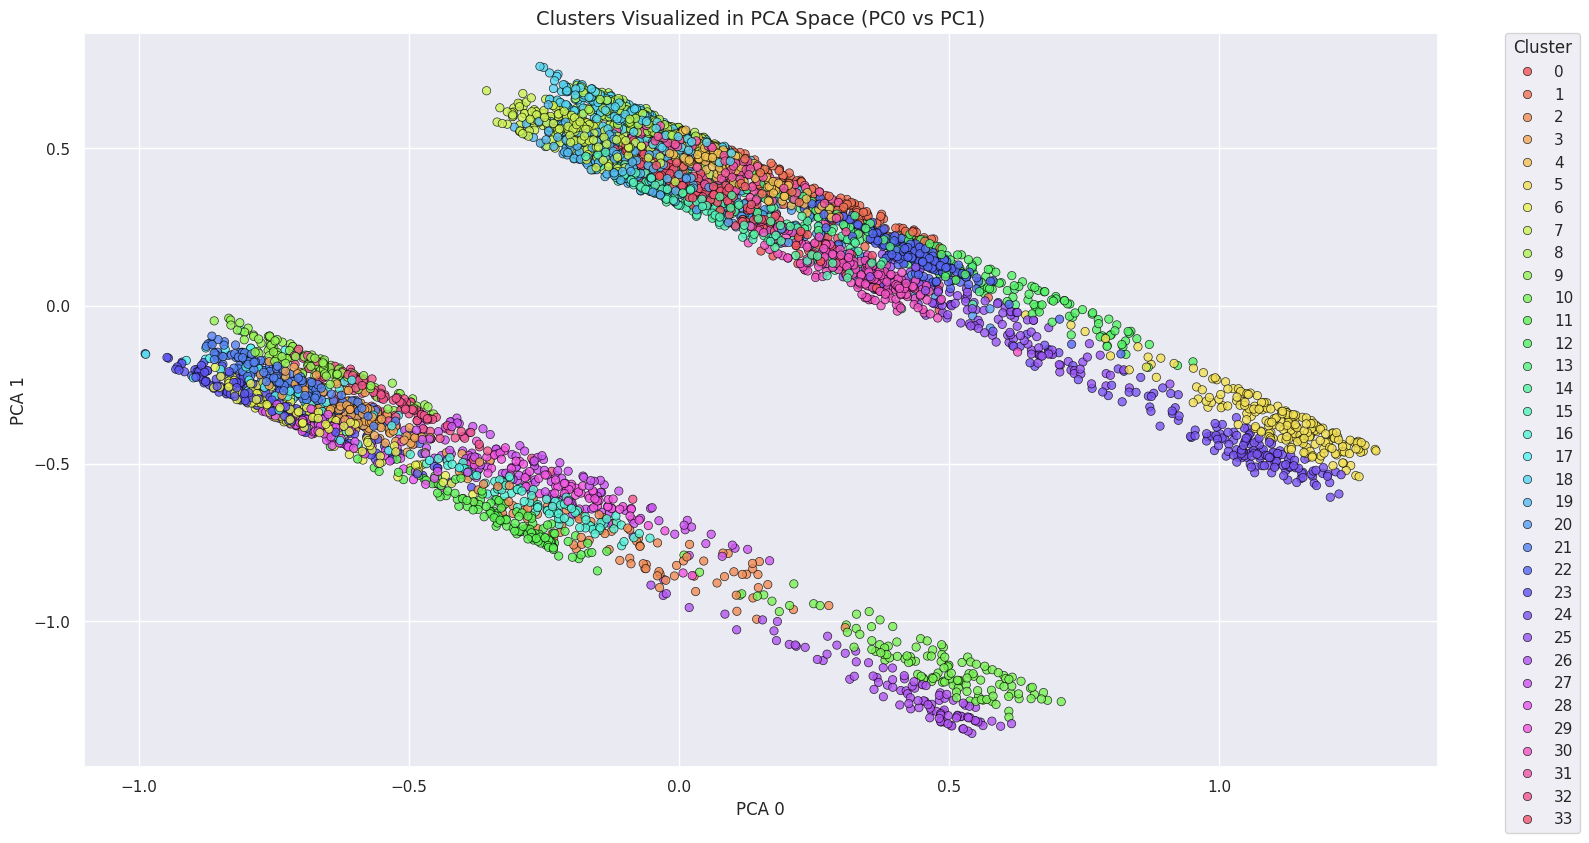

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys

# Generate 34 visually distinct colors using HSV space
def get_distinct_colors(n):
    hues = [i / n for i in range(n)]
    return [colorsys.hsv_to_rgb(h, 0.65, 0.95) for h in hues]

palette_34_distinct = get_distinct_colors(34)

plt.figure(figsize=(16, 9))
sns.scatterplot(
    data=pca_variance_df_minmax,
    x='pca0',
    y='pca1',
    hue='cluster',
    palette=palette_34_distinct,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)
plt.title('Clusters Visualized in PCA Space (PC0 vs PC1)', fontsize=14)
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()
